In [ ]:
# put 100 movies into one big data frame
import pandas as pd
import os
import re


def put_data_together():
    
    data_dir = 'movies/data/'
    pwd = os.getcwd()
    
    file_names = os.listdir(os.path.join(pwd, data_dir))
    data = None
    for file_ in file_names:
        file_dir = os.path.join(pwd, data_dir, file_)
        df = pd.read_csv(file_dir)
        df['movie_name'] = re.sub('_', ' ', file_[:-8]).capitalize()
        data = pd.concat([df, data], axis=0)
#     for i in range(0, len(file_names)):
#         file_dir = pwd + data_dir + file_names[i]
#         df = pd.read_csv(file_dir)
#         df['movie_name'] = re.sub('_', ' ', file_names[i][:-8]).capitalize()
#         data = pd.concat([df, data], axis=0)
    print "test"
    print len(data)
#     print data.iloc[1500]
    data.to_csv('data.csv', index=False)

put_data_together()    

In [3]:
# -*- coding: utf-8 -*-
# tokenize data

import csv
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def get_tokens():
    file_object = open('./movies/data2/data_tk.txt', 'w')
    
    df = pd.read_csv('./movies/data.csv')

    tokenizer = nltk.RegexpTokenizer(r'\w+')
    reviews = []

    for i in range(len(df)):
        df.loc[i]['review_detail'] = df.loc[i]['review_detail'].lower().strip()
        df.iloc[i, 3] = re.sub('\[full review in spanish\]', '', df.iloc[i, 3])    
        
        cleaned_cmt = tokenizer.tokenize(df.loc[i]['review_detail'])
        df.loc[i]['review_detail'] = str(' '.join(cleaned_cmt))
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(df.loc[i]['review_detail'])
# #         filtered_sentence = [w for w in word_tokens if not w in stop_words]

        filtered_sentence = []
        for w in word_tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        file_object.writelines(str(filtered_sentence))
        df.loc[i]['review_detail'] = str(' '.join(filtered_sentence))
        reviews.append([df.loc[i]['review_detail'],df.loc[i]['movie_name']])
    file_object.close()
    print df.iloc[0, 3]
    print reviews[1] 
    reviews = pd.DataFrame(reviews, columns=['review_detail', 'movie_name'])
#     reviews.to_csv("reviews_movie.csv", index=False)
    reviews = list(reviews.values.tolist())
    
    return df,reviews
    
[data_df, reviwes] = get_tokens()

one disney best movies past years
['zootopia pulls together various elements neo noir mystery buddy cop comedy timely social themes mostly entertaining animated film', 'Zootopia ']


In [5]:
reviwes[1]

['zootopia pulls together various elements neo noir mystery buddy cop comedy timely social themes mostly entertaining animated film',
 'Zootopia ']

In [6]:
## Sentiment analysis for whole dataset; get sentiment mean score for every movie
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import math

def get_sentiment_score():
    sid = SentimentIntensityAnalyzer()
    sentiment_review = []
    sentiment_mean = []
    for i in range(0, len(reviews)):
        sentence = reviews[i]
        ss = sid.polarity_scores(str(sentence))
    #     for k in sorted(ss):
    #         print '{0}: {1}, '.format(k, ss[k])
    #     sentiment_review.append(str(sentence))
        ss['review_detail'] = sentence[0]
        ss['movie_name'] = sentence[1]
        sentiment_review.append(ss)
    # print pd.DataFrame(sentiment_review)
    sentiment_review = pd.DataFrame(sentiment_review)
    sentiment_review.to_csv('sentiment_reviews.csv', index = False)
    for i in list(set(list(sentiment_review['movie_name']))):
        sentiment_mean.append([i, sentiment_review[\
                        sentiment_review['movie_name'] == i]['compound'].mean()])
    sentiment_mean = pd.DataFrame(sentiment_mean)
    sentiment_mean.columns = ['movie_name', 'sentiment_mean']
    sentiment_review.to_csv('sentiment_mean.csv', index = False)

    return sentiment_review, sentiment_mean

[sentiment_review, sentiment_mean] = get_sentiment_score()

/Library/Python/2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


NameError: global name 'reviews' is not defined

In [ ]:
## Sentiment analysis for whole dataset
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import math

data_df = get_tokens()

def sentiment_score():
    sid = SentimentIntensityAnalyzer()
    sentiment_review = []
    
    ## Get all the sentiment scores
    for i in range(0, len(reviews)):
        sentence = reviews[i]
        ss = sid.polarity_scores(str(sentence))
    #     for k in sorted(ss):
    #         print '{0}: {1}, '.format(k, ss[k])
    #     sentiment_review.append(str(sentence))
        ss['review_detail'] = sentence
        sentiment_review.append(ss)
    # print pd.DataFrame(sentiment_review)
    sentiment_review = pd.DataFrame(sentiment_review)
    sentiment_review['movie_name'] = data_df[i]
    sentiment_review.to_csv('sentiment_reviews.csv', index = False)
    
    ## Get mean sentiment compound for every movie
#     for row in sentiment_review:
#     zootopia_sentiment_mean = sentiment_review.loc[:, 'compound'].mean()
#     print zootopia_sentiment_mean
# print sentiment_review[2].loc['movie_name']


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from time import time
from os import path
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
import random


from wordcloud import WordCloud, STOPWORDS
import pandas as pd


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print
        
        
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([topic_idx, " ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])])
        
    return top_words


def wcplot(text, n):
    data_dir = 'movies/data2'
    pwd = os.getcwd()

    file_names = os.listdir(os.path.join(pwd, data_dir))
    file_ = 'storm-trooper.gif'
    file_dir = os.path.join(pwd, data_dir, file_)
    mask = imread(file_dir)
    
    stopwords = STOPWORDS.copy()
    stopwords.add("int")
    stopwords.add("ext")
    
    
#     bigstring=""
#     for i in range(len(dataset)):#range(len(TFreeApps)):
#         bigstring+=str(dataset.loc[i,'review'])
#     wc=WordCloud(max_words=1000, mask=mask,stopwords=stopwords, margin=10,
#                random_state=1, width=2200, height=1000).generate(dataset)
    
    wc = WordCloud(max_words=1000,stopwords=stopwords, margin=10,
               random_state=1).generate(text)
    
    plt.imshow(wc)
    plt.axis("off")
#     plt.figure()
#     plt.imshow(mask, cmap=plt.cm.gray)
#     plt.axis("off")
    title = ("top words for topic %d") % n
    plt.title(title)
    plt.show()

    

# wcplot(TFreeApps)



def topic_model():
    reviews_movie = pd.read_csv('reviews_movie_3.csv', encoding = "ISO-8859-1", error_bad_lines=False)
    n_features = 1000
    n_topics = 9
    n_top_words = 20

    # review_detail = [row[0] for row in reviews]

    tf_review_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                                    stop_words='english')
    tf_review_vectorizer._validate_vocabulary()
    tf_review = tf_review_vectorizer.fit_transform(reviews_movie.iloc[:,0])
#     print('loaded_vectorizer.get_feature_names(): {0}'.
#       format(tf_review_vectorizer.get_feature_names()))

    tf_re_feature_names = tf_review_vectorizer.get_feature_names()
    print("Fitting LDA models with tf features, n_features=%d..."
      % n_features)
    lda_re = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                    learning_method='online', learning_offset=50.,
                                    random_state=0)
    t0 = time()
    lda_re.fit(tf_review)
    print("done in %0.3fs." % (time() - t0))
    
    print("\nTopics in LDA model:\n")
    print_top_words(lda_re, tf_re_feature_names, n_top_words)
    
    topic_top_words = get_top_words(lda_re, tf_re_feature_names, n_top_words)

    # get word cloud plotting
    for i in range(0, len(topic_top_words)):
        wcplot(topic_top_words[i][1], i+1)

Fitting LDA models with tf features, n_features=1000...
done in 8.917s.

Topics in LDA model:

Topic #0:
film life la thriller moments big screen audience powerful civil music fans story familiar way years characters complex beautifully history

Topic #1:
best films year movies film marvel emotional movie really superhero true far takes mind disney fi power sci time violence

Topic #2:
film little horror sense like star come finding drama look dory people genre things world study dream linklater tension filmmaking

Topic #3:
film performance heart human character think arrival quite great book set comic man filmmaker narrative different shows captain delivers enjoyable

Topic #4:
war new movie story film documentary like america know original make doctor going want cinema watching lot say man end

Topic #5:
film way feel performances make characters story cast good experience great beautiful movie plot long strong makes worth time visual

Topic #6:
strange hollywood piece real better s

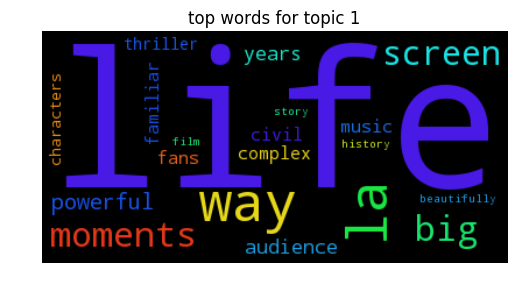

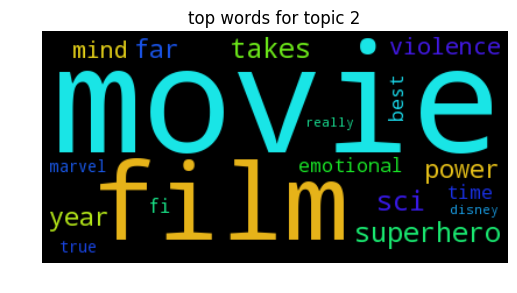

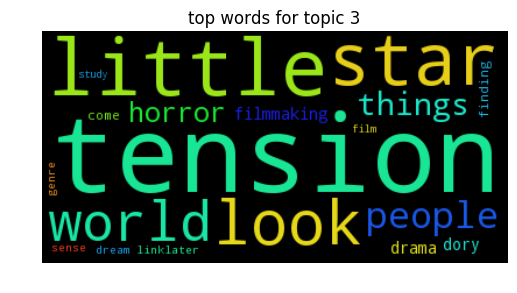

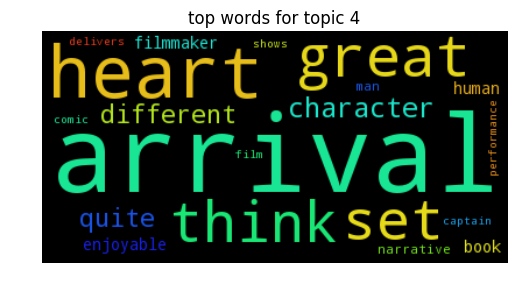

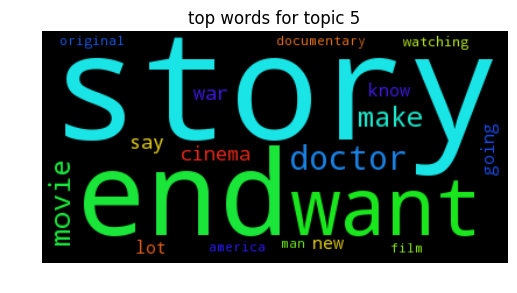

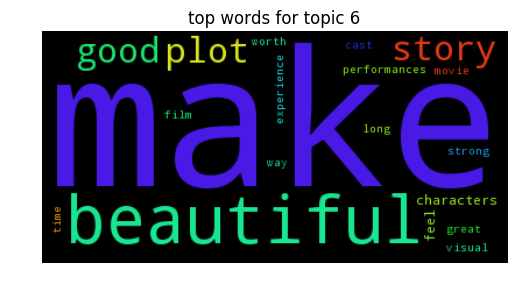

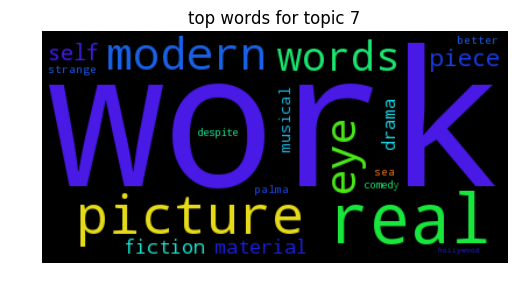

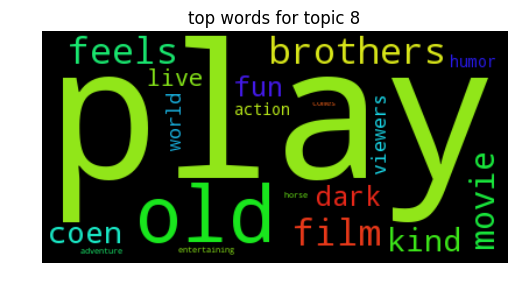

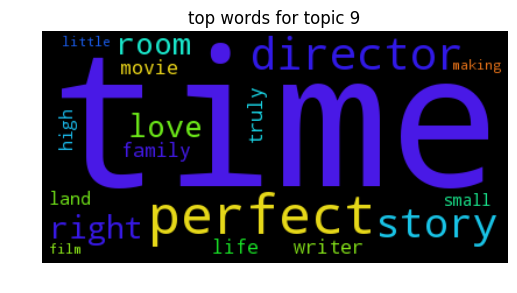

In [11]:
topic_model()